In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## NPZer

### Delcare variables and import tools

In [2]:
# Import necessary tools
import pandas as pd
import numpy as np
import sys
import os

# Declare root path for accessing package
sys.path.append(os.path.abspath(os.path.join('..', '..')))

# import module
from src.data_manipulation.NPZer import NPZer

#Instantiate NPZer
NPZer = NPZer()

# Set desired parameters ("../../" to access root directory since we are 2 folders deep and data is in root)
SOURCE_DIR = '../../data/npz_file/single_7_9_fish1.MP4_fish0.npz'
INVERT_Y = True
PARAMS = ['time', 'X', 'Y']

### NPZer.pandafy

In [3]:
# Unzip and turn data into a pandas table
unzippedData = NPZer.pandafy(source_dir=SOURCE_DIR,
                              invertY=INVERT_Y,
                              params=PARAMS)

# Print data in form of pandas table
print('TRex Data:\n', unzippedData)

TRex Data:
              time          X         Y
0        0.000000  23.536650 -1.792803
1        0.016949  23.517750 -1.792841
2        0.033898  23.517750 -1.792841
3        0.050847  23.517750 -1.792841
4        0.067796  23.517750 -1.792841
...           ...        ...       ...
10817  183.338989  19.579285 -6.965172
10818  183.355927  19.569004 -6.989434
10819  183.372879  19.588287 -7.017863
10820  183.389832  19.577187 -7.083682
10821  183.406784  19.577187 -7.083682

[10822 rows x 3 columns]


### NPZer.zipNPZ

In [4]:
# Zip unzipped data back into a .npz file
SAVE_DIR = '../data/zipped.npz'
NPZer.npzip(data=unzippedData, save_dir=SAVE_DIR)

## TRexDataCleaner

### Declare variables and import tools

In [5]:
# Import necessary tools
from src.data_manipulation.TRexDataCleaner import TRexDataCleaner

# Instantiate TRexDataCleaner
dataCleaner = TRexDataCleaner()

# Set desired parameters
VMAX = 15

# TRexDataCleaner.renderDiscontinuities

In [6]:
# Clean Data
cleanedData, removedData = dataCleaner.renderDiscontinuities(data=unzippedData, vmax=VMAX)

# Print cleaned data
print(cleanedData)

/Users/gvitale/Documents/GitHub/daphnia/src/data_manipulation/TRexDataCleaner.py:53: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  removedData = pd.concat([removedData, pd.DataFrame([data.iloc[f]])], ignore_index=True)


             time          X         Y
0        0.000000  23.536650 -1.792803
1        0.016949  23.517750 -1.792841
2        0.033898  23.517750 -1.792841
3        0.050847  23.517750 -1.792841
4        0.067796  23.517750 -1.792841
...           ...        ...       ...
10817  183.338989  19.579285 -6.965172
10818  183.355927  19.569004 -6.989434
10819  183.372879  19.588287 -7.017863
10820  183.389832  19.577187 -7.083682
10821  183.406784  19.577187 -7.083682

[10822 rows x 3 columns]


## TRexImputer

### Declare variables and import tools

In [ ]:
# Import necessary tools
from src.data_manipulation.TRexImputer import TRexImputer

# Set desired parameters
STRATEGY_DIR = '../../src/data_manipulation/imputation_strategies'
imputer = TRexImputer(strategy_dir=STRATEGY_DIR)
DATA = cleanedData
FUNCTION = 'avgValue'

### TRexImputer.impute

In [31]:
# Impute data
imputedData = imputer.impute(data=DATA, function=FUNCTION)

# Print imputed data
print('Imputed Data:\n', imputedData)

Imputing with: avgValue()
Imputed Data:
              time          X         Y
0        0.000000  23.536650 -1.792803
1        0.016949  23.517750 -1.792841
2        0.033898  23.517750 -1.792841
3        0.050847  23.517750 -1.792841
4        0.067796  23.517750 -1.792841
...           ...        ...       ...
10817  183.338989  19.579285 -6.965172
10818  183.355927  19.569004 -6.989434
10819  183.372879  19.588287 -7.017863
10820  183.389832  19.577187 -7.083682
10821  183.406784  19.577187 -7.083682

[10822 rows x 3 columns]


## Distribution of velocities

In [35]:
import src.data_visualization.avg_velocity
import importlib
importlib.reload(src.data_visualization.avg_velocity)

<module 'src.data_visualization.avg_velocity' from '/Users/gvitale/Documents/GitHub/daphnia/src/data_visualization/avg_velocity.py'>

In [41]:
from src.data_visualization.avg_velocity import all_velocity, plot_histogram, avg_velocity

velocities = avg_velocity(imputedData) # would use all_velocity if multiple data tables: all_velocity([data1, data2, ..., dataN])
print(velocities)

[1.115107386151124, 0.0, 0.0, 0.0, 0.702218737537762, 0.22417251097726817, 0.0, 0.0, 0.22417260952087312, 0.22417260952087312, 0.22417241243374986, 0.0, 0.0, 0.0, 2.018993889645131, 2.018993889645131, 1.1208483361964123, 1.1208483361964123, 0.0, 1.120781331400913, 1.3450200188807597, 0.22417260952087312, 0.412889485158276, 0.22270863296335167, 0.0, 1.3833978409143222, 0.0, 0.0, 0.0, 13.215952463241688, 0.2759615745845944, 0.2759615745843848, 0.27596157458450526, 0.2759615745845944, 14.638961310524305, 14.638961310524506, 14.63896131052431, 14.638961310524504, 14.638961310524301, 14.63896131052441, 14.63896131052451, 14.638961310524301, 14.63896131052451, 14.638961310524301, 14.63896131052451, 14.638961310524401, 14.63896131052431, 14.63896131052451, 14.638961310524301, 14.638961310524504, 14.63896131052431, 14.63896131052451, 14.638961310524401, 14.63896131052431, 14.638961310524504, 14.638961310524301, 14.63896131052451, 14.63896131052431, 14.638961310524401, 14.638961310524476, 14.63

### Plot velocity distribution

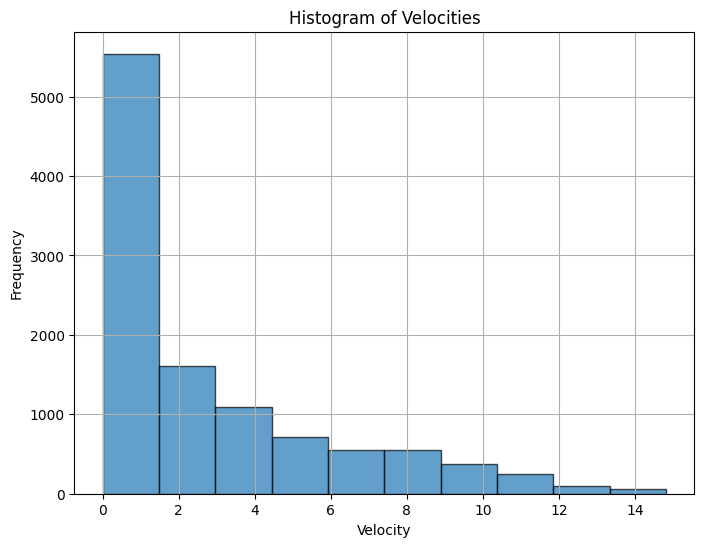

In [42]:
plot_histogram(data=velocities, bins=10)

## Visualize daphnia path

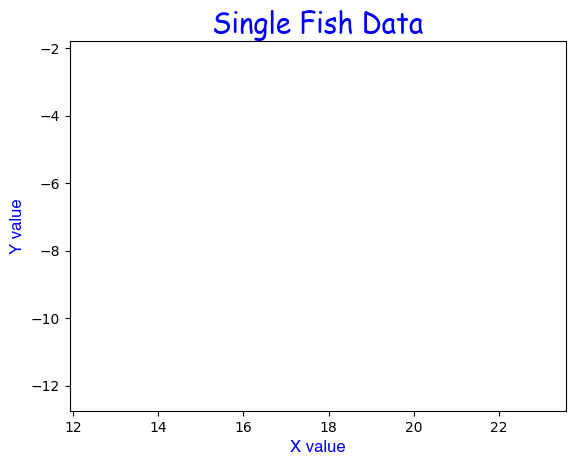

In [45]:
from src.data_visualization.visualizer import DaphniaAnimation

animation = DaphniaAnimation(df=imputedData, start_index=0, interval=15)
animation.create_animation()